# Data Overview

dataset from kaggle: https://www.kaggle.com/datasets/undersc0re/predict-the-churn-risk-rate/data

| Column name | Description |
|-------------|-------------|
| customer_id | Represents the unique identification number of a customer |
| Name | Represents the name of a customer |
| age | Represents the age of a customer |
| security_no | Represents a unique security number that is used to identify a person |
| region_category | Represents the region that a customer belongs to |
| membership_category | Represents the category of the membership that a customer is using |
| joining_date | Represents the date when a customer became a member |
| joined_through referral | Represents whether a customer joined using any referral code or ID |
| referral_id | Represents a referral ID |
| preferred_offer types | Represents the type of offer that a customer prefers |
| medium_of operation | Represents the medium of operation that a customer uses for transactions |
| internet_option | Represents the type of internet service a customer uses |
| last_visit time | Represents the last time a customer visited the website |
| days_since last login | Represents the no. of days since a customer last logged into the website |
| avg_time spent | Represents the average time spent by a customer on the website |
| avg_transaction value | Represents the average transaction value of a customer |
| avg_frequency login days | Represents the no. of times a customer has logged in to the website |
| points_in wallet | Represents the points awarded to a customer on each transaction |
| used_special discount | Represents whether a customer uses special discounts offered |
| offer_application preference | Represents whether a customer prefers offers |
| past_complaint | Represents whether a customer has raised any complaints |
| complaint_status | Represents whether the complaints raised by a customer was resolved |
| feedback | Represents the feedback provided by a customer |
| churn_risk score | Represents the churn risk score that 0 or 1 |


#Needed Installs

In [ ]:
!pip install prince

#Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from statsmodels.stats.multitest import multipletests
from itertools import combinations
from scipy.stats import chi2_contingency

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from prince import MCA

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import uniform, randint

import joblib

# Data Analysis

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/churn.csv")

In [ ]:
df.shape

(36992, 24)

In [ ]:
df.head()

Unnamed: 0  age gender security_no region_category  membership_category  \
0           0   18      F     XW0DQ7H         Village  Platinum Membership   
1           1   32      F     5K0N3X1            City   Premium Membership   
2           2   44      F     1F2TCL3            Town        No Membership   
3           3   37      M     VJGJ33N            City        No Membership   
4           4   31      F     SVZXCWB            City        No Membership   

  joining_date joined_through_referral referral_id     preferred_offer_types  \
0   2017-08-17                      No    xxxxxxxx     Gift Vouchers/Coupons   
1   2017-08-28                       ?    CID21329     Gift Vouchers/Coupons   
2   2016-11-11                     Yes    CID12313     Gift Vouchers/Coupons   
3   2016-10-29                     Yes     CID3793     Gift Vouchers/Coupons   
4   2017-09-12                      No    xxxxxxxx  Credit/Debit Card Offers   

   ... avg_time_spent avg_transaction_value avg_frequency_login_days  \
0  ...         300.63              53005.25                     17.0   
1  ...         306.34              12838.38                     10.0   
2  ...         516.16              21027.00                     22.0   
3  ...          53.27              25239.56                      6.0   
4  ...         113.13              24483.66                     16.0   

   points_in_wallet  used_special_discount  offer_application_preference  \
0            781.75                    Yes                           Yes   
1               NaN                    Yes                            No   
2            500.69                     No                           Yes   
3            567.66                     No                           Yes   
4            663.06                     No                           Yes   

  past_complaint     complaint_status                  feedback  \
0             No       Not Applicable  Products always in Stock   
1            Yes               Solved     Quality Customer Care   
2            Yes  Solved in Follow-up              Poor Website   
3            Yes             Unsolved              Poor Website   
4            Yes               Solved              Poor Website   

  churn_risk_score  
0                0  
1                0  
2                1  
3                1  
4                1  

[5 rows x 24 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    36992 non-null  int64  
 1   age                           36992 non-null  int64  
 2   gender                        36992 non-null  object 
 3   security_no                   36992 non-null  object 
 4   region_category               31564 non-null  object 
 5   membership_category           36992 non-null  object 
 6   joining_date                  36992 non-null  object 
 7   joined_through_referral       36992 non-null  object 
 8   referral_id                   36992 non-null  object 
 9   preferred_offer_types         36704 non-null  object 
 10  medium_of_operation           36992 non-null  object 
 11  internet_option               36992 non-null  object 
 12  last_visit_time               36992 non-null  object 
 13  d

In [ ]:
 pip install -U ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 24/24 [00:14<00:00,  1.61it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Checking Duplicates

korelacja - usuniecie, polaczenie 2 zmiennych, 3 sposob - PCA, MCA 0.6>, 4- 1 model z jednych, 2 model z drugich, później ensemble

In [ ]:
df.duplicated().sum()

np.int64(0)

Checking nulls

In [ ]:
df.isna().sum()

Unnamed: 0                         0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [ ]:
df.describe()

Unnamed: 0           age  days_since_last_login  avg_time_spent  \
count  36992.000000  36992.000000           36992.000000    36992.000000   
mean   18495.500000     37.118161             -41.915576      243.472334   
std    10678.814916     15.867412             228.819900      398.289149   
min        0.000000     10.000000            -999.000000    -2814.109110   
25%     9247.750000     23.000000               8.000000       60.102500   
50%    18495.500000     37.000000              12.000000      161.765000   
75%    27743.250000     51.000000              16.000000      356.515000   
max    36991.000000     64.000000              26.000000     3235.578521   

       avg_transaction_value  points_in_wallet  churn_risk_score  
count           36992.000000      33549.000000      36992.000000  
mean            29271.194003        686.882199          0.540982  
std             19444.806226        194.063624          0.498324  
min               800.460000       -760.661236          0.000000  
25%             14177.540000        616.150000          0.000000  
50%             27554.485000        697.620000          1.000000  
75%             40855.110000        763.950000          1.000000  
max             99914.050000       2069.069761          1.000000

# Checking if full rows aren't empty

In [ ]:
df[df['points_in_wallet'].isnull() & df['region_category'].isnull() & df['preferred_offer_types'].isnull()]

Unnamed: 0  age gender security_no region_category  \
4529         4529   14      F     EVGCC2T             NaN   
4734         4734   41      M     BTP3YWE             NaN   
9001         9001   52      F     IJBBW5I             NaN   
9928         9928   56      M     PYCDN6B             NaN   
16079       16079   13      F     CTAXAYD             NaN   

       membership_category joining_date joined_through_referral referral_id  \
4529       Gold Membership   2017-02-23                     Yes    CID63743   
4734    Premium Membership   2015-04-07                       ?    CID37593   
9001      Basic Membership   2017-04-20                     Yes    CID36459   
9928     Silver Membership   2017-11-20                     Yes    CID39986   
16079  Platinum Membership   2015-07-06                       ?     CID4300   

      preferred_offer_types  ... avg_time_spent avg_transaction_value  \
4529                    NaN  ...         600.32               8797.56   
4734                    NaN  ...         764.99              23781.92   
9001                    NaN  ...          68.82              28467.12   
9928                    NaN  ...          82.85              20770.22   
16079                   NaN  ...         292.36              88600.97   

      avg_frequency_login_days  points_in_wallet  used_special_discount  \
4529                      11.0               NaN                     No   
4734                       6.0               NaN                     No   
9001                     Error               NaN                    Yes   
9928                      25.0               NaN                     No   
16079                      5.0               NaN                    Yes   

       offer_application_preference past_complaint     complaint_status  \
4529                            Yes             No       Not Applicable   
4734                            Yes            Yes  Solved in Follow-up   
9001                             No             No       Not Applicable   
9928                            Yes             No       Not Applicable   
16079                            No             No       Not Applicable   

                    feedback churn_risk_score  
4529    Poor Product Quality                0  
4734    Poor Product Quality                0  
9001   Poor Customer Service                1  
9928            Poor Website                0  
16079       Reasonable Price                0  

[5 rows x 24 columns]

#Deleting unneeded data

In [ ]:
df.drop(columns=['Unnamed: 0', 'security_no', 'referral_id'], inplace=True)

Unnamed: 0 - 100% data unique  
Security_no -  unique security number  
Refferal_id - we don't need id, we have column 'joined_through referral' Represents whether a customer joined using any referral code or ID |

#Changing data types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   gender                        36992 non-null  object 
 2   region_category               31564 non-null  object 
 3   membership_category           36992 non-null  object 
 4   joining_date                  36992 non-null  object 
 5   joined_through_referral       36992 non-null  object 
 6   preferred_offer_types         36704 non-null  object 
 7   medium_of_operation           36992 non-null  object 
 8   internet_option               36992 non-null  object 
 9   last_visit_time               36992 non-null  object 
 10  days_since_last_login         36992 non-null  int64  
 11  avg_time_spent                36992 non-null  float64
 12  avg_transaction_value         36992 non-null  float64
 13  a

In [ ]:
df['joining_date'] = df['joining_date'].astype('datetime64[ns]')

In [ ]:
df['last_visit_time'] = df['last_visit_time'].astype('datetime64[ns]')

In [ ]:
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].replace("Error", 0).astype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   age                           36992 non-null  int64         
 1   gender                        36992 non-null  object        
 2   region_category               31564 non-null  object        
 3   membership_category           36992 non-null  object        
 4   joining_date                  36992 non-null  datetime64[ns]
 5   joined_through_referral       36992 non-null  object        
 6   preferred_offer_types         36704 non-null  object        
 7   medium_of_operation           36992 non-null  object        
 8   internet_option               36992 non-null  object        
 9   last_visit_time               36992 non-null  datetime64[ns]
 10  days_since_last_login         36992 non-null  int64         
 11  avg_time_spent              

#Analysis categorical data

In [ ]:
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features

Index(['gender', 'region_category', 'membership_category',
       'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback'],
      dtype='object')

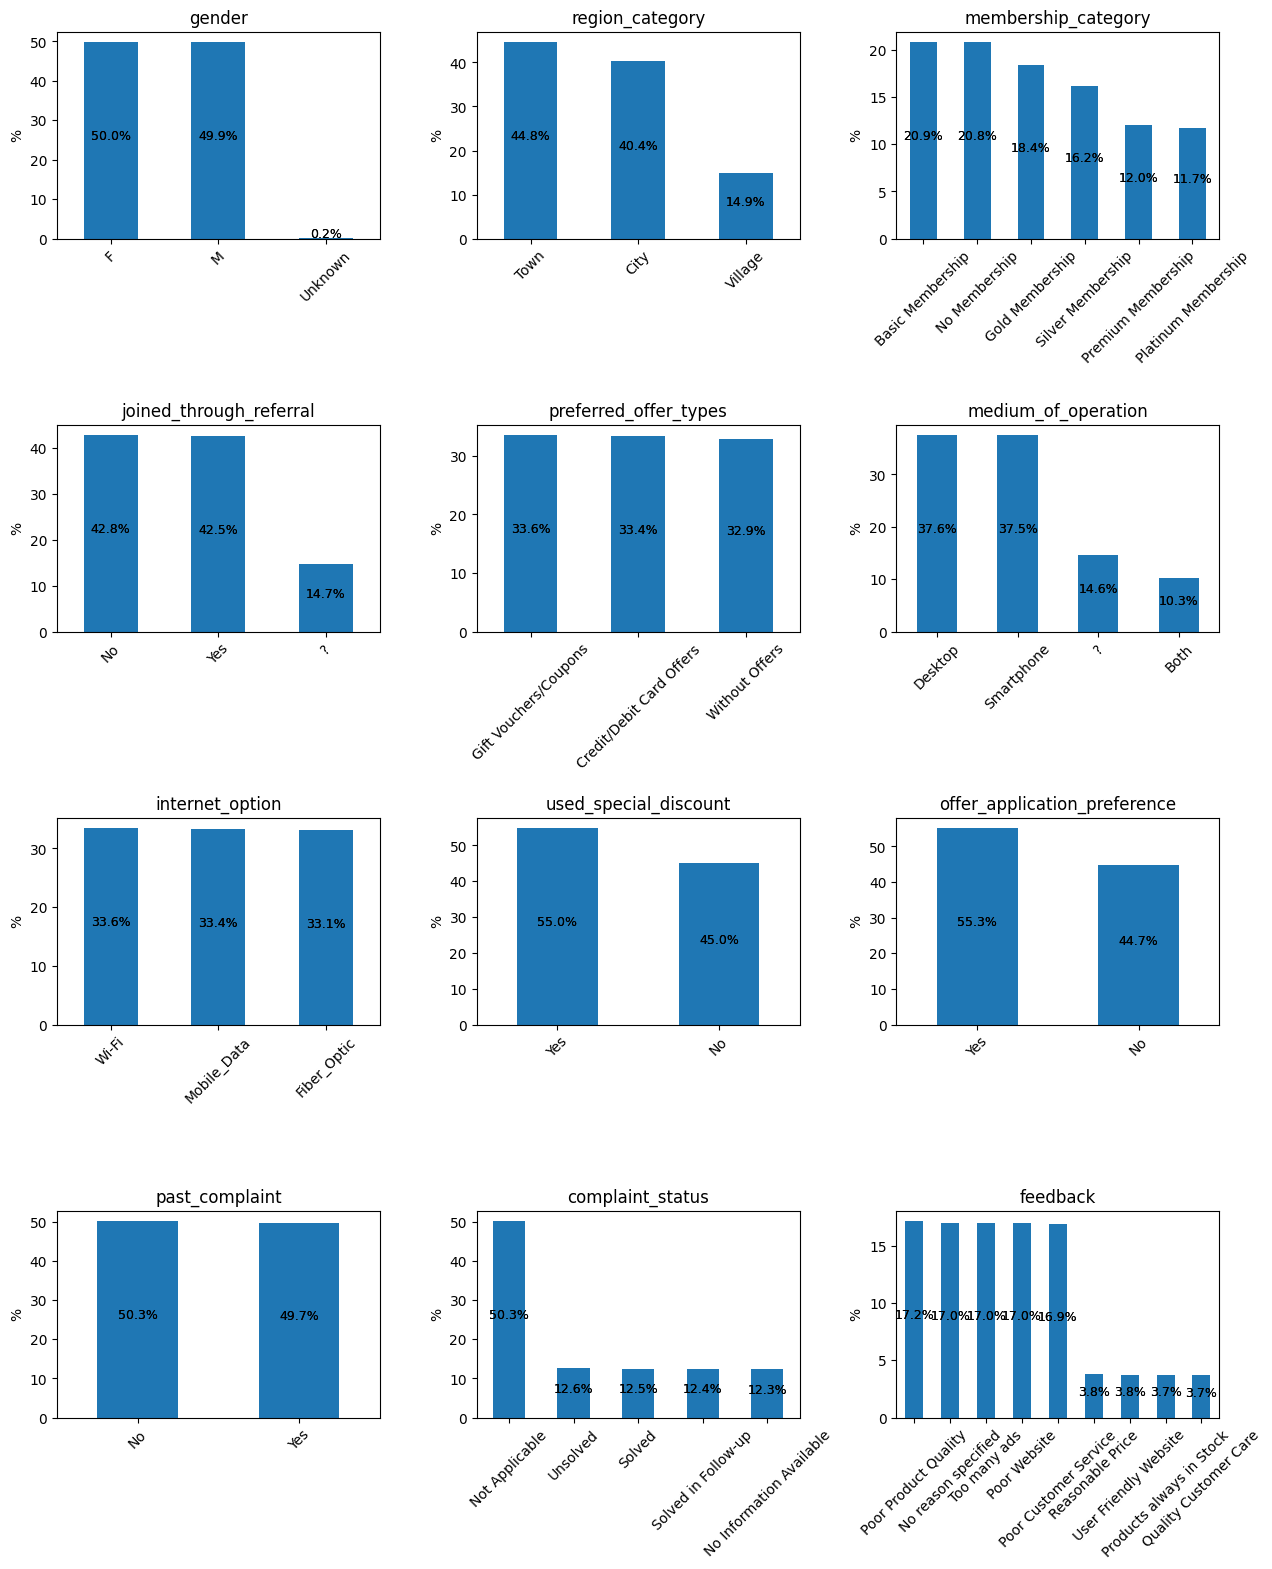

In [ ]:
fig = plt.figure(figsize=(15, 18))
num_features = len(categorical_features)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

for i, feature in enumerate(categorical_features):
    ax = fig.add_subplot(num_rows, num_cols, i + 1)
    ax.set_title(feature)
    (df[feature].value_counts(normalize=True) * 100).plot.bar(ax=ax)

    counts = df[feature].value_counts(normalize=True) * 100
    bars = counts.plot.bar(ax=ax)

    ax.set_ylabel("%")
    ax.set_xlabel("")
    plt.xticks(rotation=45)

    for bar in bars.containers:
        ax.bar_label(bar, fmt="%.1f%%", fontsize=9, padding=3, label_type='center')

plt.subplots_adjust(hspace=0.9, wspace=0.3)
plt.show()

In [ ]:
round(df['feedback'].value_counts()/len(df['feedback']) * 100,2).astype('str') + '%'

feedback
Poor Product Quality        17.17%
No reason specified          17.0%
Too many ads                16.97%
Poor Website                16.95%
Poor Customer Service        16.9%
Reasonable Price             3.83%
User Friendly Website        3.76%
Products always in Stock     3.74%
Quality Customer Care        3.68%
Name: count, dtype: object

##Analysis numerical data

In [ ]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
numerical_features = numerical_features.drop('churn_risk_score')
numerical_features

Index(['age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet'],
      dtype='object')

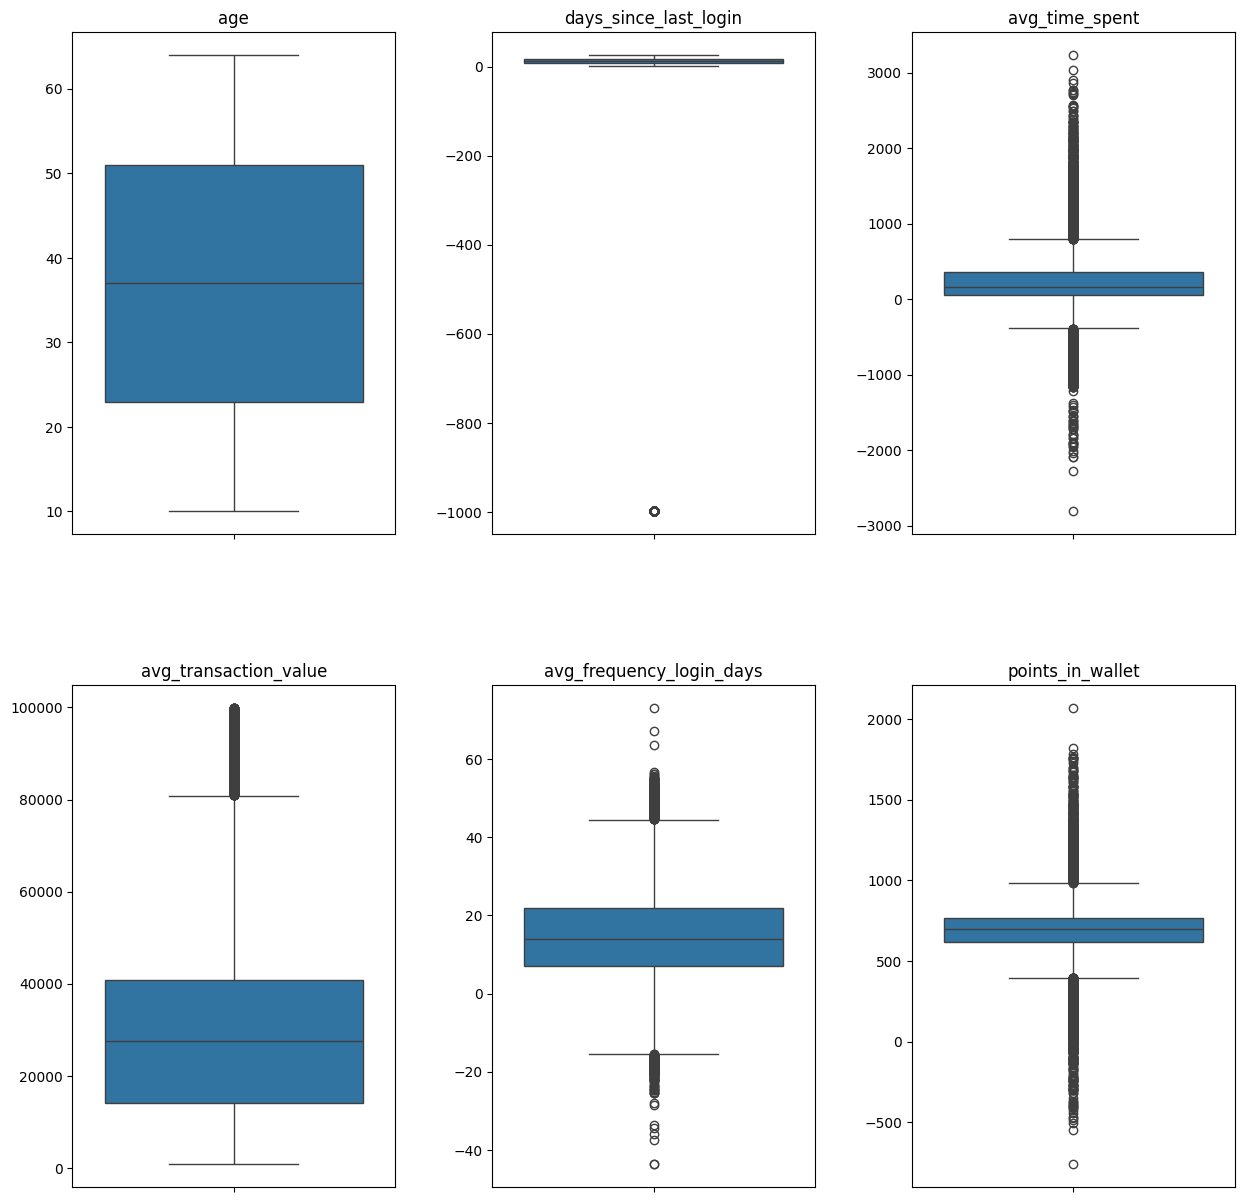

In [ ]:
def plot_boxplots(df=df, numerical_features=numerical_features):
  fig = plt.figure(figsize=(15, 15))
  num_features = len(numerical_features)
  num_cols = 3
  num_rows = (num_features + num_cols - 1) // num_cols

  for i, feature in enumerate(numerical_features):
      ax = fig.add_subplot(num_rows, num_cols, i + 1)
      ax.set_title(feature)
      sns.boxplot(data=df[feature], ax=ax)

      ax.set_ylabel("")
      ax.set_xlabel("")
      plt.xticks(rotation=45)

  plt.subplots_adjust(hspace=0.3, wspace=0.3)
  plt.show()

plot_boxplots()

Columns like avg_frequency_login_days, points_in_the_wallet, avg_time_spent, days_since_last_login shoulnd't be negative

In [ ]:
not_negative_columns = ['avg_frequency_login_days', 'points_in_wallet', 'avg_time_spent', 'days_since_last_login']

for col in not_negative_columns:
    df.loc[df[col] < 0, col] = 0

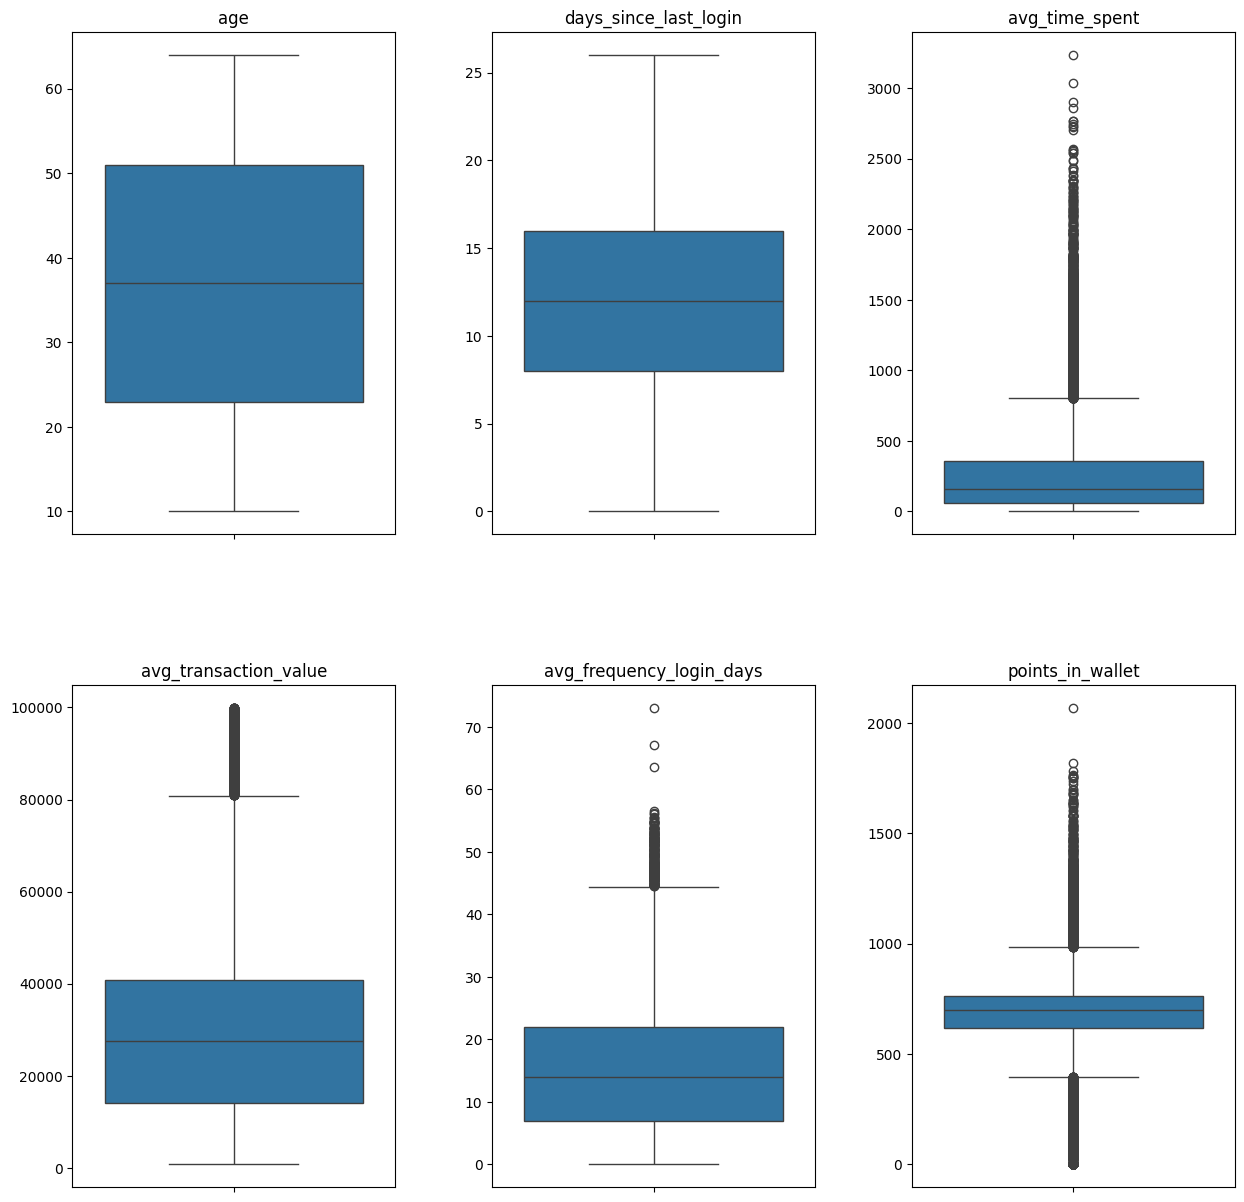

In [ ]:
plot_boxplots()

ilosci binow - pierwiastek z ilosci obserwacji

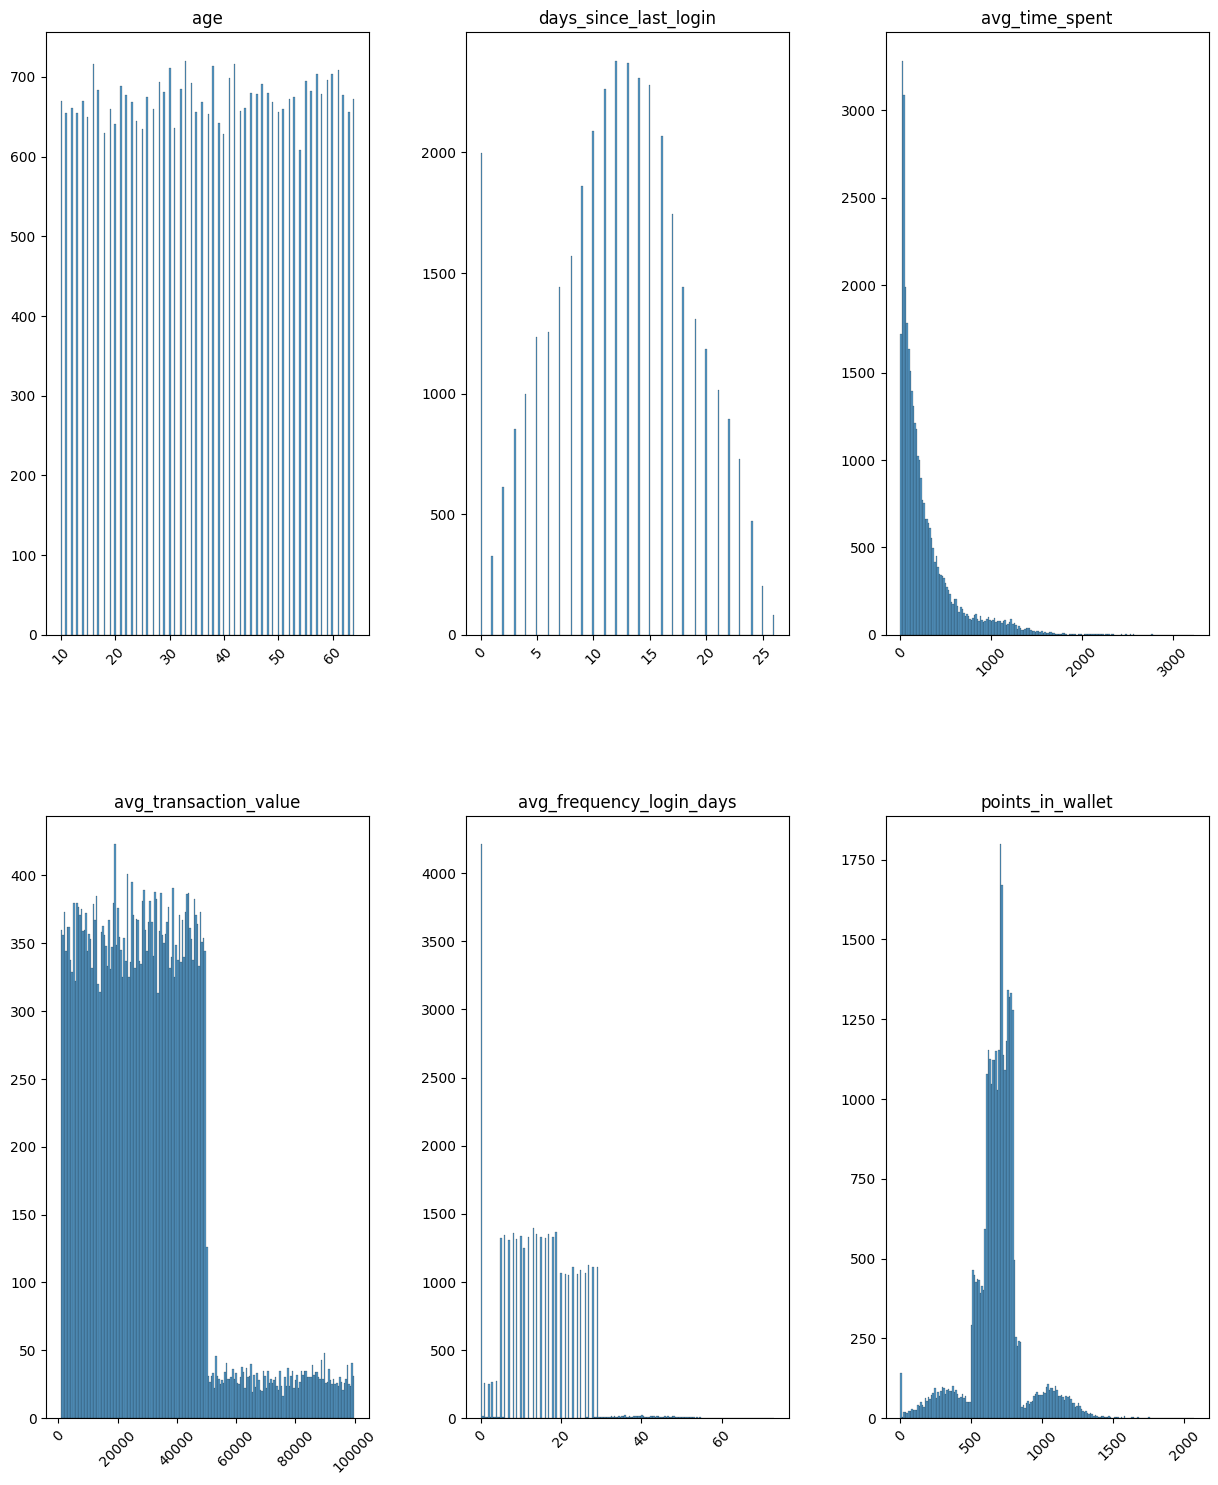

In [ ]:
fig = plt.figure(figsize=(15, 18))
num_features = len(numerical_features)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

for i, feature in enumerate(numerical_features):
    ax = fig.add_subplot(num_rows, num_cols, i + 1)
    ax.set_title(feature)
    sns.histplot(data=df[feature], ax=ax, bins=int(round(len(df[feature])**0.5, 0)))

    ax.set_ylabel("")
    ax.set_xlabel("")
    plt.xticks(rotation=45)

plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

#Manage nulls

In [ ]:
round(df.isna().sum() / len(df) * 100, 2).astype('str') + '%'

age                               0.0%
gender                            0.0%
region_category                 14.67%
membership_category               0.0%
joining_date                      0.0%
joined_through_referral           0.0%
preferred_offer_types            0.78%
medium_of_operation               0.0%
internet_option                   0.0%
last_visit_time                   0.0%
days_since_last_login             0.0%
avg_time_spent                    0.0%
avg_transaction_value             0.0%
avg_frequency_login_days          0.0%
points_in_wallet                 9.31%
used_special_discount             0.0%
offer_application_preference      0.0%
past_complaint                    0.0%
complaint_status                  0.0%
feedback                          0.0%
churn_risk_score                  0.0%
dtype: object

Deleting nulls < 5% dataset

In [ ]:
df.dropna(subset=['preferred_offer_types'], inplace=True)

Inputing 'region_category' with 'Other'

In [ ]:
df.fillna({'region_category' : 'Other'}, inplace=True)

After checking distribution median would be okay to inpute

In [ ]:
df['points_in_wallet'] = df['points_in_wallet'].fillna(df['points_in_wallet'].median())

Changing the missing values in the other columns to Other, Unknown, etc., to keep the format consistent.

In [ ]:
df['gender'] = df['gender'].replace('Unknown', 'Other')
df['joined_through_referral'] = df['joined_through_referral'].replace('?', 'Other')
df['medium_of_operation'] = df['medium_of_operation'].replace('?', 'Other')

Ewentualnie model ktory bedzie przewidywal wartosci, i czy ta zmienna jak jest do predykowanej

Czy te nulle dobrze zrobilam bo jak jest Other i jest mało to czy nie powinno sie usunac

# Overview of columns connected with date

In [ ]:
df[['last_visit_time','days_since_last_login']].head()

last_visit_time  days_since_last_login
0 2025-04-16 16:08:02                     17
1 2025-04-16 12:38:13                     16
2 2025-04-16 22:53:21                     14
3 2025-04-16 15:57:50                     11
4 2025-04-16 15:46:44                     20

last_visit time - Represents the last time a customer visited the website  
days_since last login - Represents the no. of days since a customer last logged into the website  


It's gives as same information, better for model is days_since_last_login

In [ ]:
df.drop(columns=['last_visit_time'], inplace=True)

In [ ]:
df['joining_date'].head()

0   2017-08-17
1   2017-08-28
2   2016-11-11
3   2016-10-29
4   2017-09-12
Name: joining_date, dtype: datetime64[ns]

Checking last date in Dataset

In [ ]:
df['joining_date'].max()

Timestamp('2017-12-31 00:00:00')

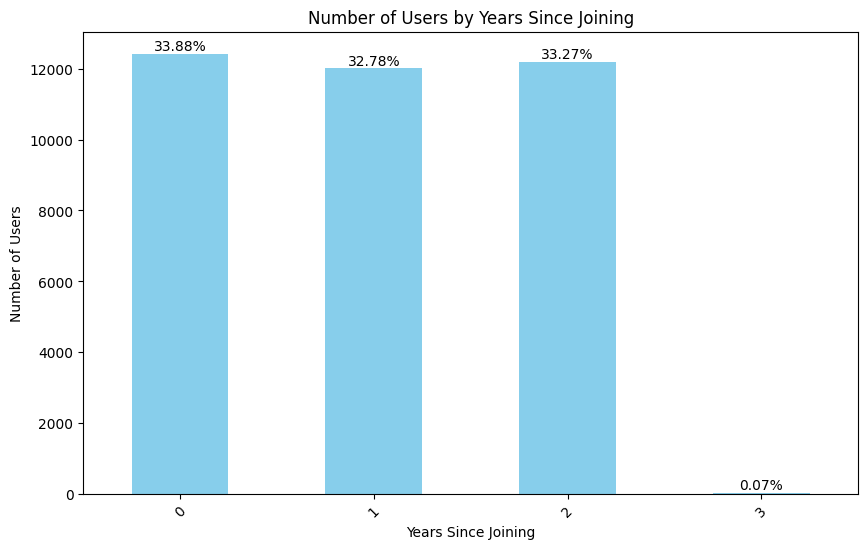

In [ ]:
last_date = pd.to_datetime("31.12.2017", dayfirst=True)
df['days_since_joined'] = (last_date - df['joining_date']).dt.days

df['years_since_joined'] = df['days_since_joined'] // 365
years_counts = df['years_since_joined'].value_counts().sort_index()
years_percent = (years_counts / years_counts.sum()) * 100


plt.figure(figsize=(10, 6))
years_counts.plot(kind='bar', color='skyblue')
for i, v in enumerate(years_counts):
    plt.text(i, v + 0.5, f'{years_percent.iloc[i]:.2f}%', ha='center', va='bottom', fontsize=10)
plt.title('Number of Users by Years Since Joining')
plt.xlabel('Years Since Joining')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

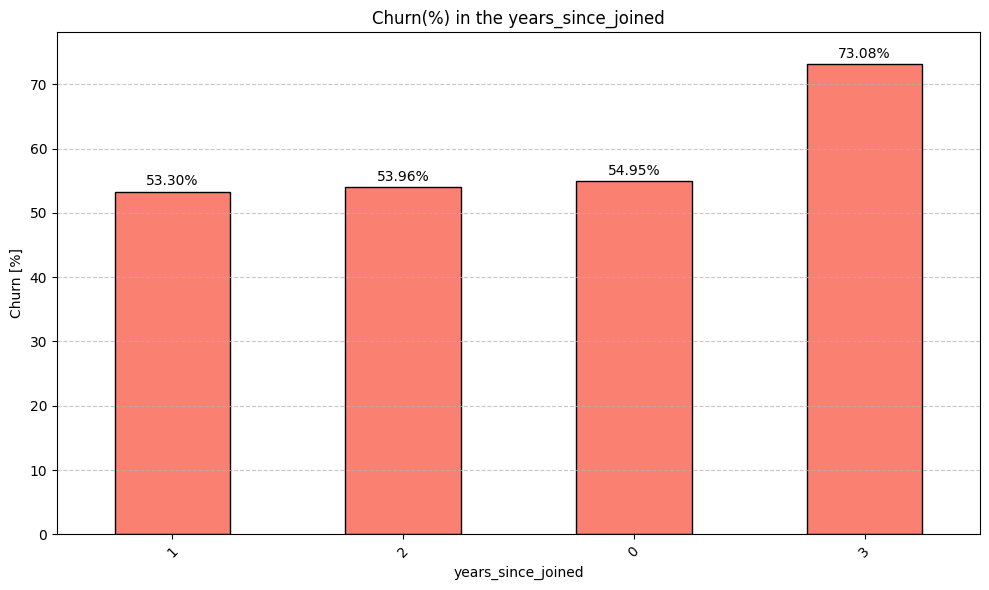

In [ ]:
def churn_to_col(date):
  churn_by_date = df.groupby(date)['churn_risk_score'].mean().sort_values()

  churn_percent = churn_by_date * 100

  plt.figure(figsize=(10, 6))
  churn_percent.plot(kind='bar', color='salmon', edgecolor='black')

  plt.title('Churn(%) in the ' + date)
  plt.xlabel(date)
  plt.ylabel('Churn [%]')
  plt.xticks(rotation=45)
  plt.ylim(0, churn_percent.max() + 5)

  for i, v in enumerate(churn_percent):
      plt.text(i, v + 0.5, f'{v:.2f}%', ha='center', va='bottom')

  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.tight_layout()
  plt.show()

churn_to_col('years_since_joined')

Checking difference in quarter of joining.

In [ ]:
df['join_week'] = df['joining_date'].dt.isocalendar().week
df['join_quarter'] = df['joining_date'].dt.quarter
df['join_quarter'].value_counts()

join_quarter
3    9321
4    9242
2    9141
1    9000
Name: count, dtype: int64

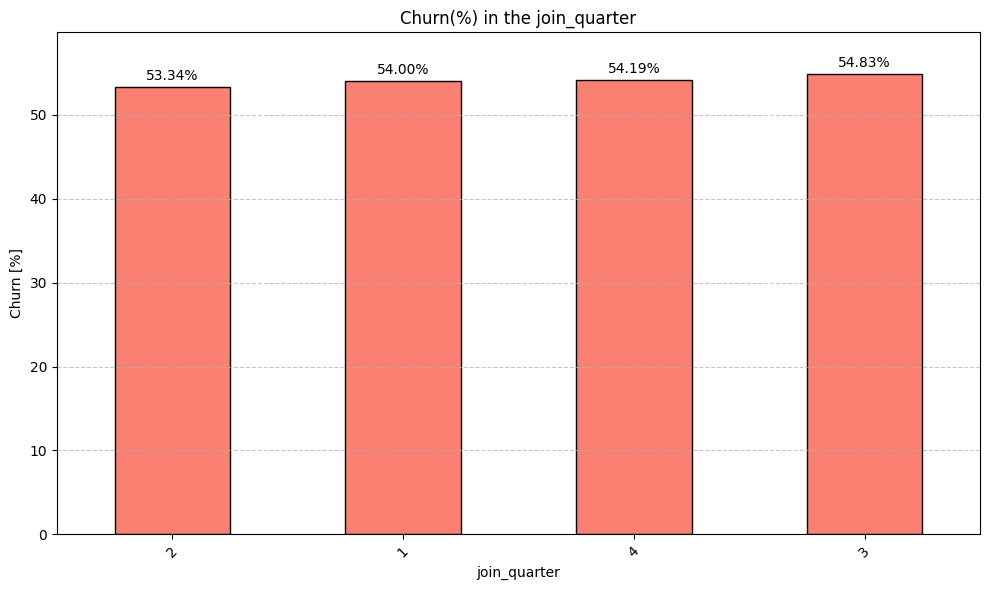

In [ ]:
churn_to_col('join_quarter')

Checking difference in day of the week of joining.

In [ ]:
df['join_weekday'] = df['joining_date'].dt.dayofweek  # pon=0, ndz=6
df['join_weekday_name'] = df['joining_date'].dt.day_name()
df['join_weekday_name'].value_counts()

join_weekday_name
Friday       5389
Sunday       5258
Thursday     5256
Tuesday      5253
Monday       5249
Saturday     5171
Wednesday    5128
Name: count, dtype: int64

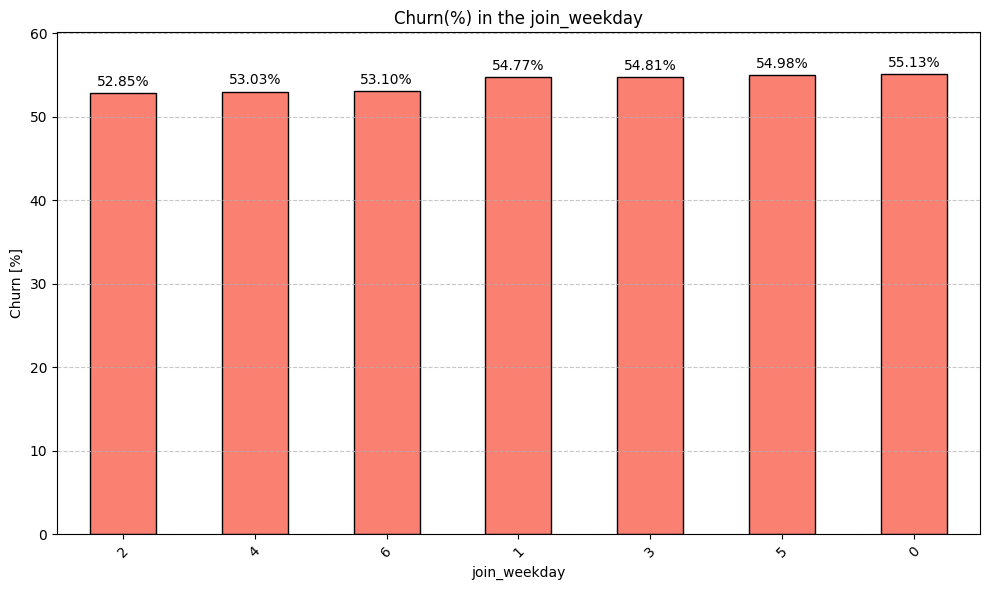

In [ ]:
churn_to_col('join_weekday')

We see that, is no a difference on quartile/day of joining, but is difference in years_since_joined

In [ ]:
df.drop(columns=['joining_date', 'join_weekday', 'join_quarter', 'days_since_joined','join_week', 'join_weekday_name'], inplace=True)

In [ ]:
numerical_features = numerical_features.union(pd.Index(['years_since_joined']))
numerical_features

Index(['age', 'avg_frequency_login_days', 'avg_time_spent',
       'avg_transaction_value', 'days_since_last_login', 'points_in_wallet',
       'years_since_joined'],
      dtype='object')

#Processing data

Changing feedback to positive or negative.

In [ ]:
def get_category(x):
    if x in ['Poor Product Quality', 'Too many ads', 'Poor Website', 'Poor Customer Service']:
        return 'Negative'
    elif x in ['Reasonable Price', 'User Friendly Website', 'Products always in Stock']:
        return 'Positive'
    else:
        return 'Other'

df['feedback_positive'] = df['feedback'].apply(get_category)
df['feedback_positive'].value_counts()

feedback_positive
Negative    24955
Other        7588
Positive     4161
Name: count, dtype: int64

In [ ]:
df.drop(columns=['feedback'], inplace=True)

In [ ]:
categorical_features = categorical_features.append(pd.Index(['feedback_positive']))
categorical_features = categorical_features.drop('feedback')

Checking columns: complaint_status, past_complaint

In [ ]:
df[['complaint_status', 'past_complaint']].head()

complaint_status past_complaint
0       Not Applicable             No
1               Solved            Yes
2  Solved in Follow-up            Yes
3             Unsolved            Yes
4               Solved            Yes

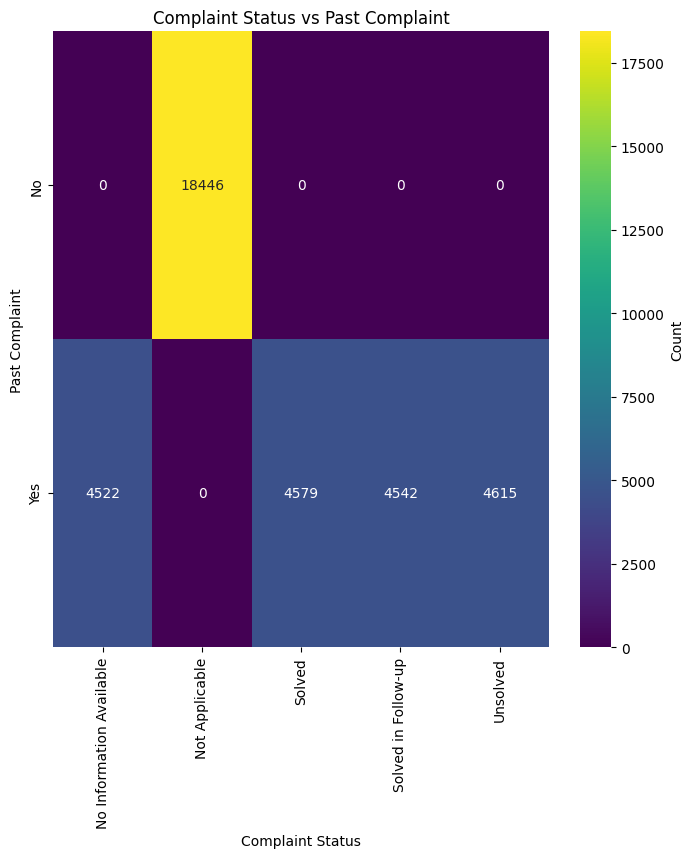

In [ ]:
plt.figure(figsize=(8, 8))

df_dhist = df.pivot_table(
    index='past_complaint',
    columns='complaint_status',
    aggfunc='size',
    fill_value=0
)

sns.heatmap(df_dhist, cmap='viridis', annot=True, fmt='d', cbar_kws={'label': 'Count'})

plt.xlabel('Complaint Status')
plt.ylabel('Past Complaint')
plt.title('Complaint Status vs Past Complaint')

plt.show()

This chart shows that all Resolved and Unresolved data fall into the YES category, which makes sense since a complaint was filed (complaint_status). On the other hand, data in the NO category belong to the Other group, meaning that no complaint was filed or such information is unavailable.

Based on this, we can conclude that the past_complaint column can be removed.

In [ ]:
df.drop(columns=['past_complaint'], inplace=True)

In [ ]:
categorical_features = categorical_features.drop('past_complaint')

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

age gender region_category  membership_category joined_through_referral  \
0   18      F         Village  Platinum Membership                      No   
1   32      F            City   Premium Membership                   Other   
2   44      F            Town        No Membership                     Yes   
3   37      M            City        No Membership                     Yes   
4   31      F            City        No Membership                      No   

      preferred_offer_types medium_of_operation internet_option  \
0     Gift Vouchers/Coupons               Other           Wi-Fi   
1     Gift Vouchers/Coupons             Desktop     Mobile_Data   
2     Gift Vouchers/Coupons             Desktop           Wi-Fi   
3     Gift Vouchers/Coupons             Desktop     Mobile_Data   
4  Credit/Debit Card Offers          Smartphone     Mobile_Data   

   days_since_last_login  avg_time_spent  avg_transaction_value  \
0                     17          300.63               53005.25   
1                     16          306.34               12838.38   
2                     14          516.16               21027.00   
3                     11           53.27               25239.56   
4                     20          113.13               24483.66   

   avg_frequency_login_days  points_in_wallet used_special_discount  \
0                      17.0           781.750                   Yes   
1                      10.0           697.665                   Yes   
2                      22.0           500.690                    No   
3                       6.0           567.660                    No   
4                      16.0           663.060                    No   

  offer_application_preference     complaint_status  churn_risk_score  \
0                          Yes       Not Applicable                 0   
1                           No               Solved                 0   
2                          Yes  Solved in Follow-up                 1   
3                          Yes             Unsolved                 1   
4                          Yes               Solved                 1   

   years_since_joined feedback_positive  
0                   0          Positive  
1                   0             Other  
2                   1          Negative  
3                   1          Negative  
4                   0          Negative

**Bounding Age**

Based on the chart into 4 groups

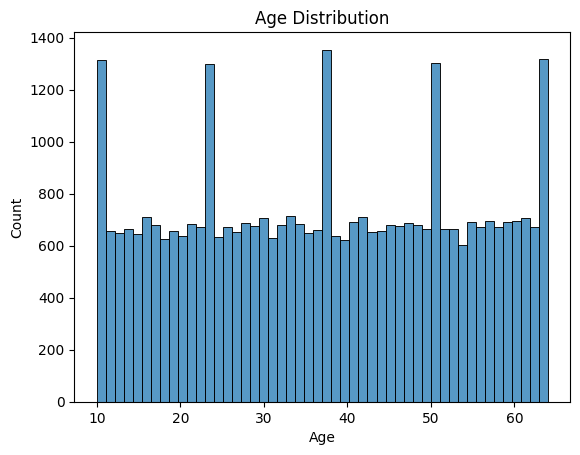

In [ ]:
sns.histplot(data=df, x='age', bins=50)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
age_quartiles = df['age'].quantile([0.25, 0.5, 0.75])
age_quartiles

0.25    23.0
0.50    37.0
0.75    51.0
Name: age, dtype: float64

In [ ]:
def bound_age(age):
  if age<23:
    return 'Youth'
  elif age<37:
    return 'Adult'
  elif age<51:
    return 'Middle-aged'
  else:
    return 'Senior'

df['age_bound'] = df['age'].apply(bound_age)
df['age_bound'].value_counts()

age_bound
Senior         9408
Middle-aged    9363
Adult          9339
Youth          8594
Name: count, dtype: int64

Bounding based on histogram and quartilies

In [ ]:
df.drop(columns=['age'], inplace=True)

In [ ]:
numerical_features = numerical_features.drop('age')

Checking sense of groups with **Kruskal Wallis**

In [ ]:
senior_chunk_risk_score = df[df['age_bound'] == 'Senior']['churn_risk_score']
middle_aged_chunk_risk_score = df[df['age_bound'] == 'Middle-aged']['churn_risk_score']
adult_chunk_risk_score = df[df['age_bound'] == 'Adult']['churn_risk_score']
youth_chunk_risk_score = df[df['age_bound'] == 'Youth']['churn_risk_score']

stat, p_value = stats.kruskal(senior_chunk_risk_score, middle_aged_chunk_risk_score, adult_chunk_risk_score, youth_chunk_risk_score)

print("Kruskal-Wallis H-statistic:", stat)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("The difference is statistically significant.")
else:
    print("The difference is not statistically significant.")

Kruskal-Wallis H-statistic: 5.760508296669719
P-value: 0.12386150077672874
The difference is not statistically significant.


More than 1 group so I did correction with Bonferroni Test

In [ ]:
senior = df[df['age_bound'] == 'Senior']['churn_risk_score']
middle_aged = df[df['age_bound'] == 'Middle-aged']['churn_risk_score']
adult = df[df['age_bound'] == 'Adult']['churn_risk_score']
youth = df[df['age_bound'] == 'Youth']['churn_risk_score']

group_names = ['Senior', 'Middle-aged', 'Adult', 'Youth']
group_data = [senior, middle_aged, adult, youth]

group_pairs = list(combinations(range(len(group_data)), 2))

p_values = []
pair_names = []
for idx1, idx2 in group_pairs:
    g1_data = group_data[idx1]
    g2_data = group_data[idx2]
    g1_name = group_names[idx1]
    g2_name = group_names[idx2]

    stat, p = stats.mannwhitneyu(g1_data, g2_data, alternative='two-sided')
    p_values.append(p)
    pair_names.append(f"{g1_name} vs {g2_name}")

reject, pvals_corrected, _, _ = multipletests(p_values, alpha=0.05, method='bonferroni')

print("Comparison results:")
for pair, p_orig, p_corr, rej in zip(pair_names, p_values, pvals_corrected, reject):
    print(f"{pair}: original p = {p_orig:.4f}, corrected p = {p_corr:.4f}", end=' ')
    if rej:
        print("The difference is statistically significant.")
    else:
        print("The difference is not statistically significant.")


Comparison results:
Senior vs Middle-aged: original p = 0.5135, corrected p = 1.0000 The difference is not statistically significant.
Senior vs Adult: original p = 0.6847, corrected p = 1.0000 The difference is not statistically significant.
Senior vs Youth: original p = 0.0635, corrected p = 0.3807 The difference is not statistically significant.
Middle-aged vs Adult: original p = 0.2902, corrected p = 1.0000 The difference is not statistically significant.
Middle-aged vs Youth: original p = 0.2242, corrected p = 1.0000 The difference is not statistically significant.
Adult vs Youth: original p = 0.0245, corrected p = 0.1469 The difference is not statistically significant.


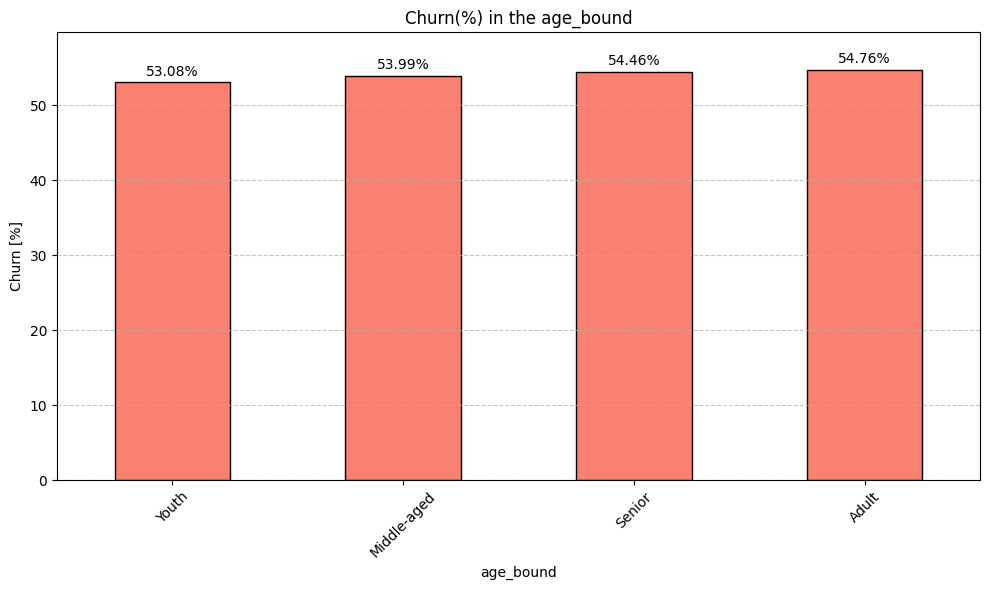

In [ ]:
churn_to_col('age_bound')

Age bound not statistically significant.

In [ ]:
df.drop(columns=['age_bound'], inplace=True)

Rounding data to 2 decimal places

In [ ]:
df[['avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']] = df[['avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']].round(2)

In [ ]:
df.head()

gender region_category  membership_category joined_through_referral  \
0      F         Village  Platinum Membership                      No   
1      F            City   Premium Membership                   Other   
2      F            Town        No Membership                     Yes   
3      M            City        No Membership                     Yes   
4      F            City        No Membership                      No   

      preferred_offer_types medium_of_operation internet_option  \
0     Gift Vouchers/Coupons               Other           Wi-Fi   
1     Gift Vouchers/Coupons             Desktop     Mobile_Data   
2     Gift Vouchers/Coupons             Desktop           Wi-Fi   
3     Gift Vouchers/Coupons             Desktop     Mobile_Data   
4  Credit/Debit Card Offers          Smartphone     Mobile_Data   

   days_since_last_login  avg_time_spent  avg_transaction_value  \
0                     17          300.63               53005.25   
1                     16          306.34               12838.38   
2                     14          516.16               21027.00   
3                     11           53.27               25239.56   
4                     20          113.13               24483.66   

   avg_frequency_login_days  points_in_wallet used_special_discount  \
0                      17.0            781.75                   Yes   
1                      10.0            697.66                   Yes   
2                      22.0            500.69                    No   
3                       6.0            567.66                    No   
4                      16.0            663.06                    No   

  offer_application_preference     complaint_status  churn_risk_score  \
0                          Yes       Not Applicable                 0   
1                           No               Solved                 0   
2                          Yes  Solved in Follow-up                 1   
3                          Yes             Unsolved                 1   
4                          Yes               Solved                 1   

   years_since_joined feedback_positive  
0                   0          Positive  
1                   0             Other  
2                   1          Negative  
3                   1          Negative  
4                   0          Negative

#Selecting variables for the model

##Categorical data

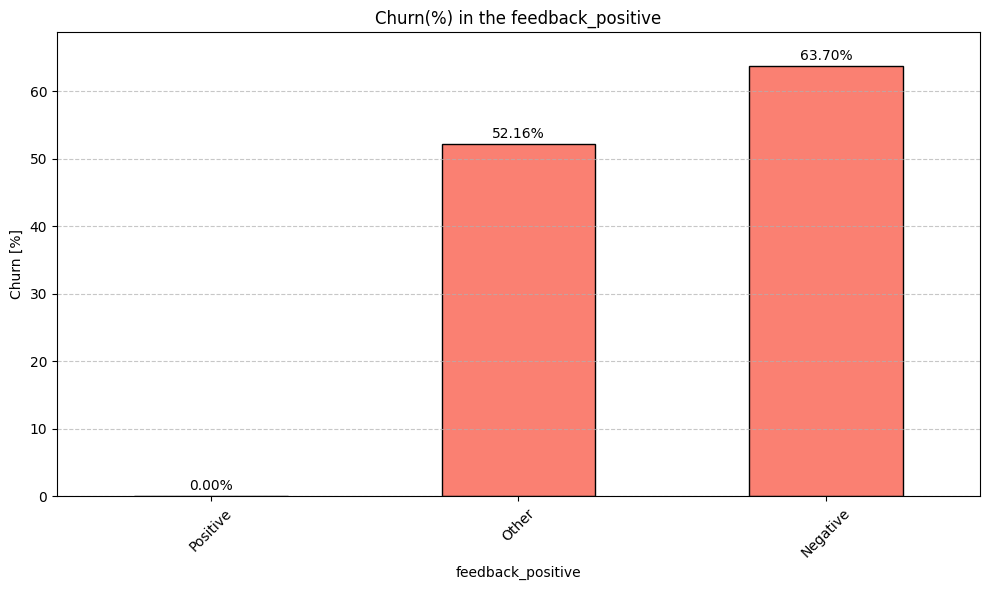

In [ ]:
churn_to_col('feedback_positive')

In [ ]:
df['feedback_positive'].value_counts()

feedback_positive
Negative    24955
Other        7588
Positive     4161
Name: count, dtype: int64

##Numerical Data

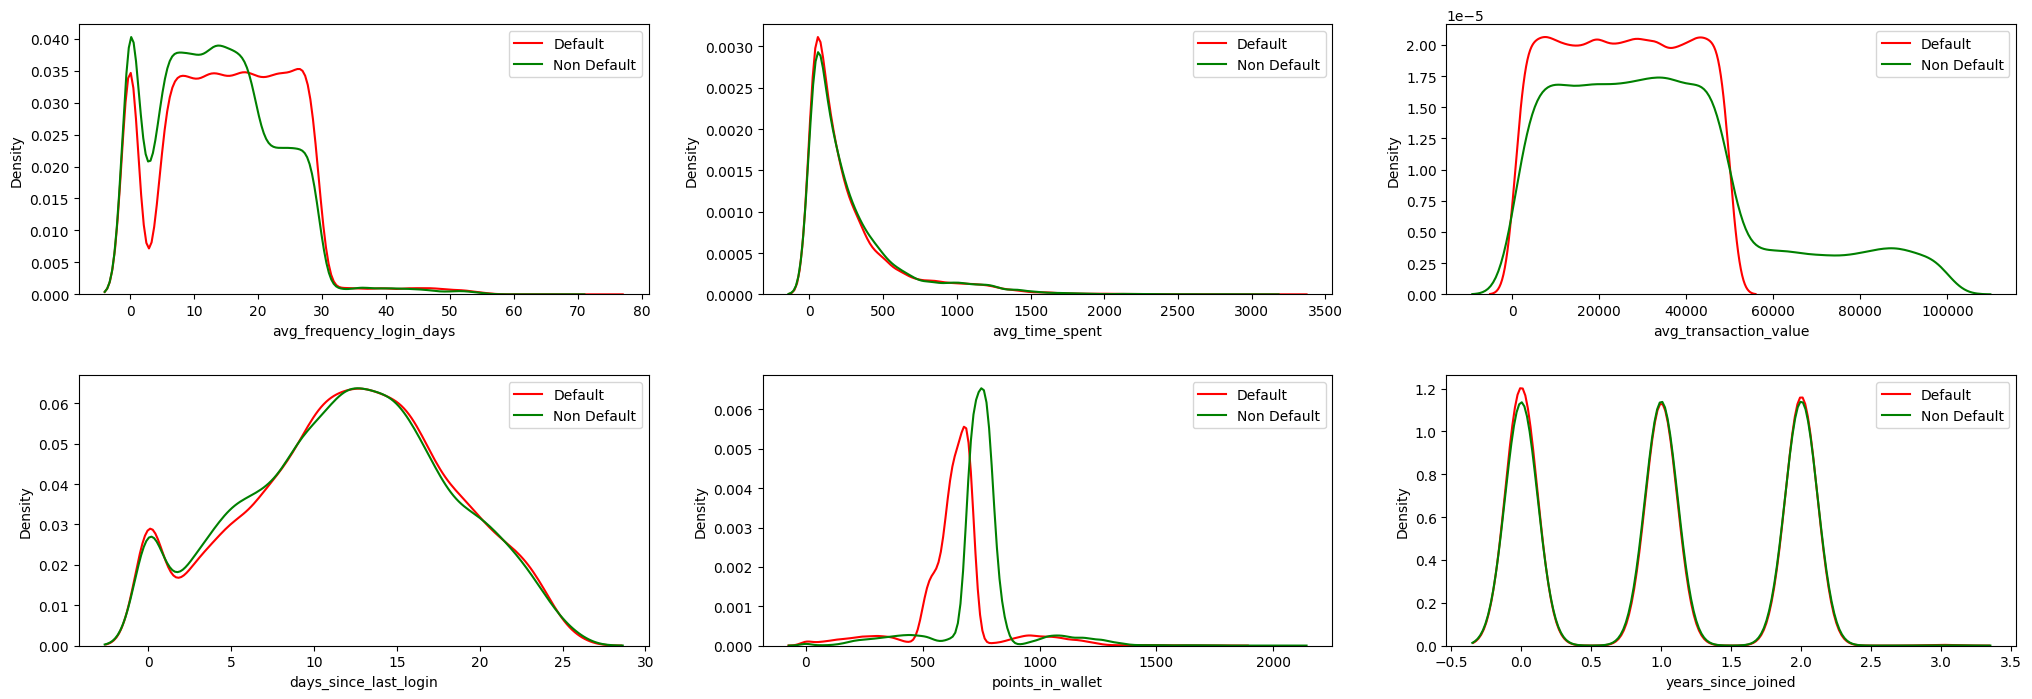

In [ ]:
fig = plt.figure(figsize=(25, 40))
for i, cecha in enumerate(numerical_features):
    ax = fig.add_subplot(9, 3, i+1)
    sns.kdeplot(df.loc[df["churn_risk_score"] == 1, cecha], ax=ax, color="red", label="Default", fill=False)
    sns.kdeplot(df.loc[df["churn_risk_score"] == 0, cecha], ax=ax, color="green", label="Non Default", fill=False)
    plt.legend()

plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.show()


Avg_time_spent, days_since_last_login Probably no difference to model

##Coreration chart

V kramer - kategoryczna+kategoryczna, chi(kwadrat)=kategoryczna+kategoryczna
Biserial - numeryczna + binarna

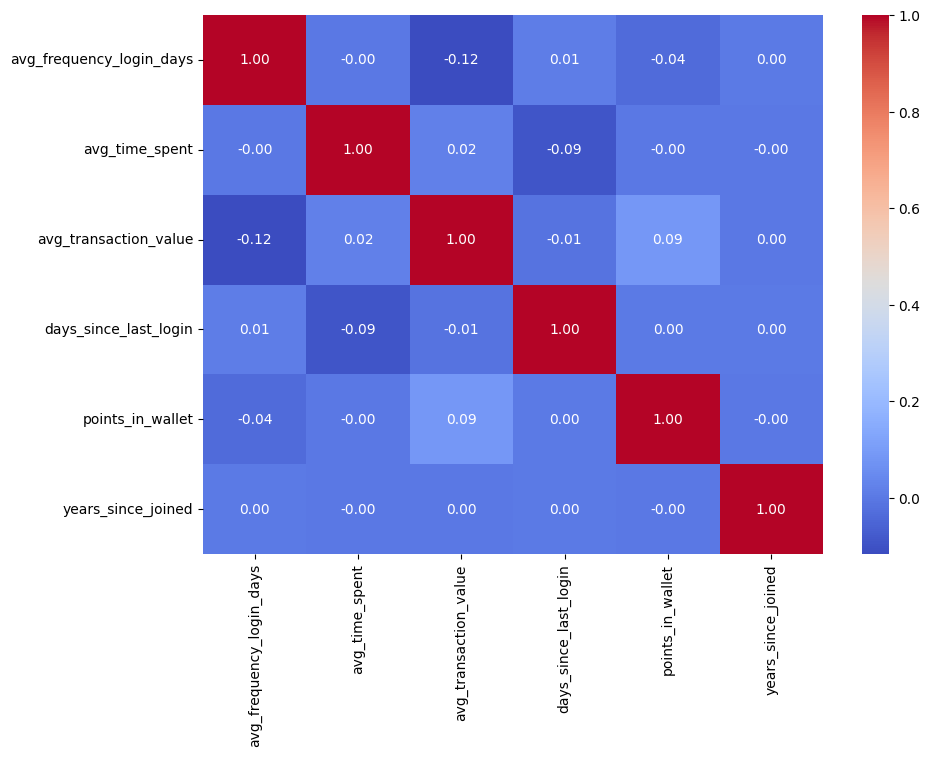

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Correlation: categorical + categorical Variable - V-kramer, chi_2

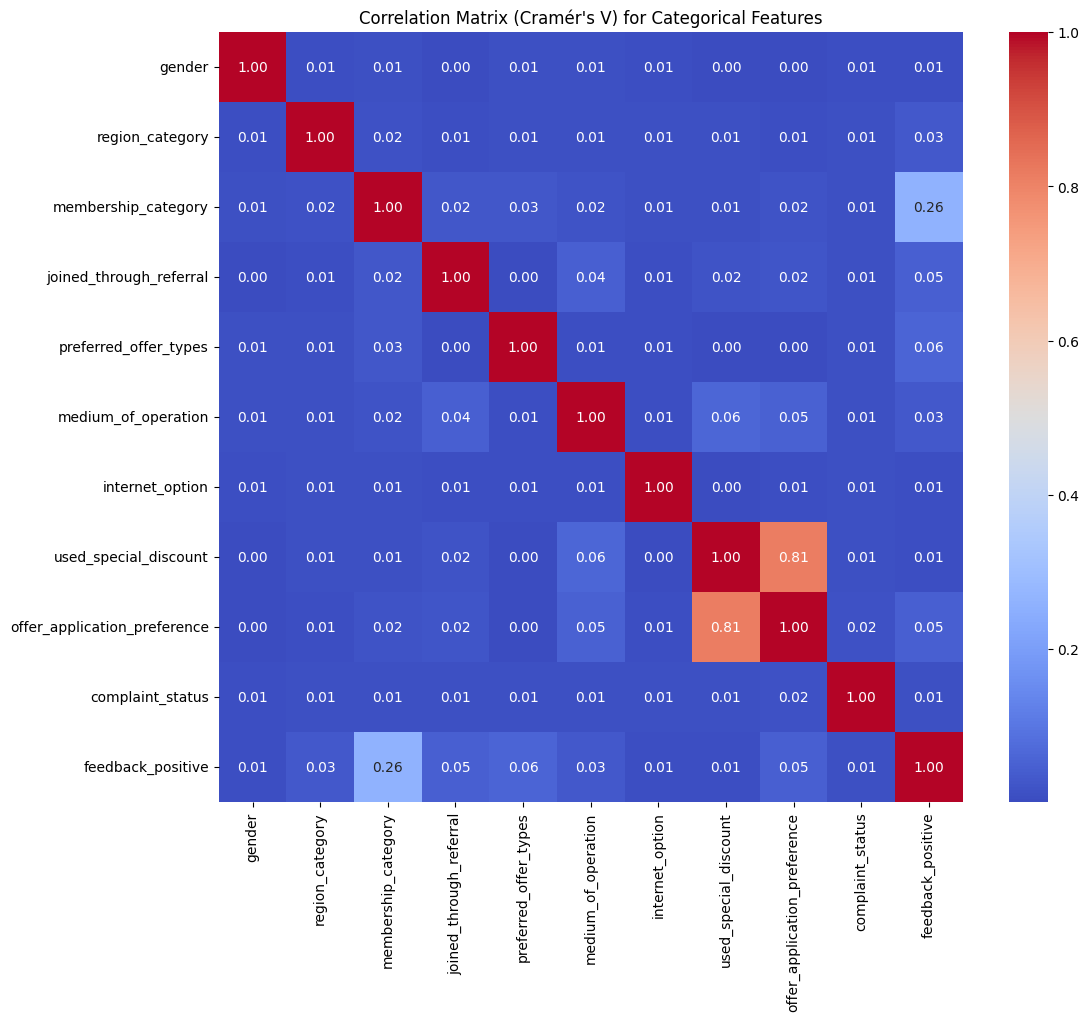

In [ ]:
def cramers_v(x, y):
    """
    Calculates Cramér's V, a measure of association between two nominal variables.
    """
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2max = min((k - 1), (r - 1))
    return np.sqrt(phi2 / phi2max)

categorical_corr = pd.DataFrame(index=categorical_features, columns=categorical_features)
for col1, col2 in itertools.combinations_with_replacement(categorical_features, 2):
    corr = cramers_v(df[col1], df[col2])
    categorical_corr.loc[col1, col2] = corr
    categorical_corr.loc[col2, col1] = corr

plt.figure(figsize=(12, 10))
sns.heatmap(categorical_corr.astype(float), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Cramér's V) for Categorical Features")
plt.show()

In [ ]:
df[['used_special_discount', 'offer_application_preference']]

used_special_discount offer_application_preference
0                       Yes                          Yes
1                       Yes                           No
2                        No                          Yes
3                        No                          Yes
4                        No                          Yes
...                     ...                          ...
36987                    No                          Yes
36988                   Yes                           No
36989                    No                          Yes
36990                   Yes                          Yes
36991                   Yes                           No

[36704 rows x 2 columns]

In [ ]:
mca = MCA(n_components=1)
X_combined = mca.fit_transform(df[['used_special_discount', 'offer_application_preference']])

df['used_special_discount_offer_application_preference'] = X_combined

In [ ]:
df['used_special_discount_offer_application_preference']

0        0.002484
1        1.008061
2       -1.002525
3       -1.002525
4       -1.002525
           ...   
36987   -1.002525
36988    1.008061
36989   -1.002525
36990    0.002484
36991    1.008061
Name: used_special_discount_offer_application_preference, Length: 36704, dtype: float64

In [ ]:
categorical_features = categorical_features.drop(['used_special_discount','offer_application_preference'])
numerical_features = numerical_features.append(pd.Index(['used_special_discount_offer_application_preference']))

In [ ]:
df.drop(columns=['used_special_discount', 'offer_application_preference'], inplace=True)

#Statistical Tests



## Checking Difference between women and men for a model

**Test T** - normalność rozkładu danych, duża grupa - tylko numeryczne!

Test nieparametryczny **Test U Manna-Whitneya (Wilcoxona)** - nie wymaga normalności, lepszy dla danych zawierających odstające wartości

In [ ]:
female_chunk_risk_score = df[df['gender'] == 'F']['churn_risk_score']
male_chunk_risk_score = df[df['gender'] == 'M']['churn_risk_score']

alpha = 0.05

stat, p_value = stats.mannwhitneyu(female_chunk_risk_score, male_chunk_risk_score)

print("U-statistic:", stat)
print("P-value:", p_value)

if p_value < alpha:
    print("The difference is statistically significant.")
else:
    print("The difference is not statistically significant.")

U-statistic: 168689910.0
P-value: 0.3457270866965926
The difference is not statistically significant.


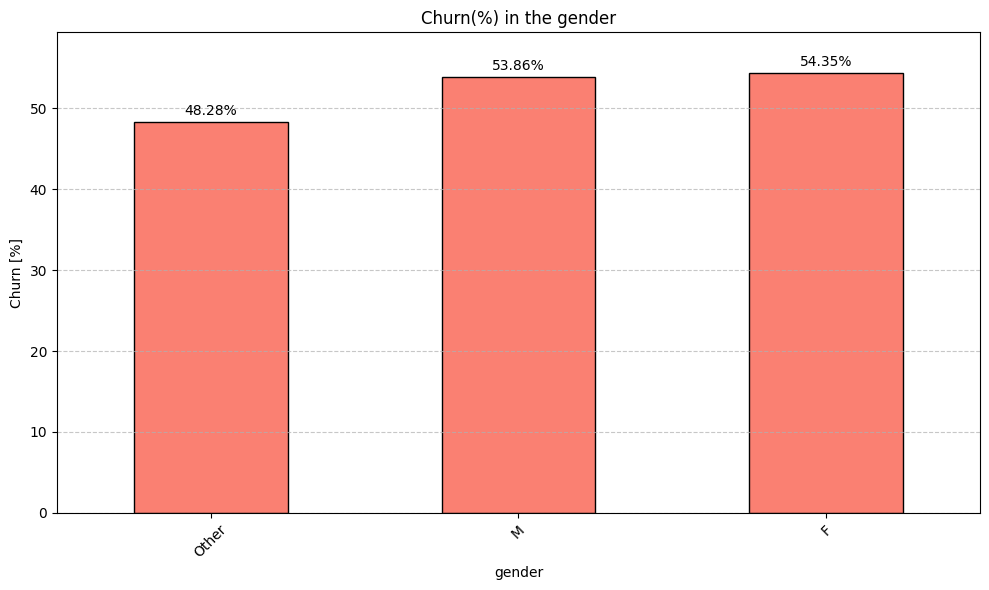

In [ ]:
churn_to_col('gender')

Deleting gender from model.

In [ ]:
df.drop('gender', axis=1, inplace=True)

In [ ]:
categorical_features = categorical_features.drop('gender')

#Processing

In [ ]:
df.head()

region_category  membership_category joined_through_referral  \
0         Village  Platinum Membership                      No   
1            City   Premium Membership                   Other   
2            Town        No Membership                     Yes   
3            City        No Membership                     Yes   
4            City        No Membership                      No   

      preferred_offer_types medium_of_operation internet_option  \
0     Gift Vouchers/Coupons               Other           Wi-Fi   
1     Gift Vouchers/Coupons             Desktop     Mobile_Data   
2     Gift Vouchers/Coupons             Desktop           Wi-Fi   
3     Gift Vouchers/Coupons             Desktop     Mobile_Data   
4  Credit/Debit Card Offers          Smartphone     Mobile_Data   

   days_since_last_login  avg_time_spent  avg_transaction_value  \
0                     17          300.63               53005.25   
1                     16          306.34               12838.38   
2                     14          516.16               21027.00   
3                     11           53.27               25239.56   
4                     20          113.13               24483.66   

   avg_frequency_login_days  points_in_wallet     complaint_status  \
0                      17.0            781.75       Not Applicable   
1                      10.0            697.66               Solved   
2                      22.0            500.69  Solved in Follow-up   
3                       6.0            567.66             Unsolved   
4                      16.0            663.06               Solved   

   churn_risk_score  years_since_joined feedback_positive  \
0                 0                   0          Positive   
1                 0                   0             Other   
2                 1                   1          Negative   
3                 1                   1          Negative   
4                 1                   0          Negative   

   used_special_discount_offer_application_preference  
0                                           0.002484   
1                                           1.008061   
2                                          -1.002525   
3                                          -1.002525   
4                                          -1.002525

##Ordinal Encoding

In [ ]:
encoder = OrdinalEncoder()

encoded = encoder.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(encoded, columns=categorical_features)

encoded_df

region_category  membership_category  joined_through_referral  \
0                  3.0                  3.0                      0.0   
1                  0.0                  4.0                      1.0   
2                  2.0                  2.0                      2.0   
3                  0.0                  2.0                      2.0   
4                  0.0                  2.0                      0.0   
...                ...                  ...                      ...   
36699              1.0                  0.0                      0.0   
36700              2.0                  0.0                      0.0   
36701              1.0                  0.0                      2.0   
36702              3.0                  3.0                      0.0   
36703              2.0                  5.0                      0.0   

       preferred_offer_types  medium_of_operation  internet_option  \
0                        1.0                  2.0              2.0   
1                        1.0                  1.0              1.0   
2                        1.0                  1.0              2.0   
3                        1.0                  1.0              1.0   
4                        0.0                  3.0              1.0   
...                      ...                  ...              ...   
36699                    0.0                  1.0              2.0   
36700                    2.0                  3.0              2.0   
36701                    1.0                  1.0              2.0   
36702                    1.0                  3.0              1.0   
36703                    1.0                  1.0              1.0   

       complaint_status  feedback_positive  
0                   1.0                2.0  
1                   2.0                1.0  
2                   3.0                0.0  
3                   4.0                0.0  
4                   2.0                0.0  
...                 ...                ...  
36699               0.0                1.0  
36700               1.0                0.0  
36701               4.0                0.0  
36702               1.0                1.0  
36703               1.0                1.0  

[36704 rows x 8 columns]

In [ ]:
preprocessed_df = encoded_df.join(df[numerical_features.tolist() + ['churn_risk_score']])
preprocessed_df

region_category  membership_category  joined_through_referral  \
0                  3.0                  3.0                      0.0   
1                  0.0                  4.0                      1.0   
2                  2.0                  2.0                      2.0   
3                  0.0                  2.0                      2.0   
4                  0.0                  2.0                      0.0   
...                ...                  ...                      ...   
36699              1.0                  0.0                      0.0   
36700              2.0                  0.0                      0.0   
36701              1.0                  0.0                      2.0   
36702              3.0                  3.0                      0.0   
36703              2.0                  5.0                      0.0   

       preferred_offer_types  medium_of_operation  internet_option  \
0                        1.0                  2.0              2.0   
1                        1.0                  1.0              1.0   
2                        1.0                  1.0              2.0   
3                        1.0                  1.0              1.0   
4                        0.0                  3.0              1.0   
...                      ...                  ...              ...   
36699                    0.0                  1.0              2.0   
36700                    2.0                  3.0              2.0   
36701                    1.0                  1.0              2.0   
36702                    1.0                  3.0              1.0   
36703                    1.0                  1.0              1.0   

       complaint_status  feedback_positive  avg_frequency_login_days  \
0                   1.0                2.0                      17.0   
1                   2.0                1.0                      10.0   
2                   3.0                0.0                      22.0   
3                   4.0                0.0                       6.0   
4                   2.0                0.0                      16.0   
...                 ...                ...                       ...   
36699               0.0                1.0                      18.0   
36700               1.0                0.0                       0.0   
36701               4.0                0.0                      17.0   
36702               1.0                1.0                       9.0   
36703               1.0                1.0                      24.0   

       avg_time_spent  avg_transaction_value  days_since_last_login  \
0              300.63               53005.25                   17.0   
1              306.34               12838.38                   16.0   
2              516.16               21027.00                   14.0   
3               53.27               25239.56                   11.0   
4              113.13               24483.66                   20.0   
...               ...                    ...                    ...   
36699          840.86               11718.89                   10.0   
36700         1619.03               41148.81                   15.0   
36701           84.02               46660.92                    8.0   
36702          414.92               43734.65                   20.0   
36703          238.89               18836.24                   14.0   

       points_in_wallet  years_since_joined  \
0                781.75                 0.0   
1                697.66                 0.0   
2                500.69                 1.0   
3                567.66                 1.0   
4                663.06                 0.0   
...                 ...                 ...   
36699            799.95                 2.0   
36700            608.73                 2.0   
36701            697.66                 2.0   
36702            562.74                 2.0   
36703            693.96                 2.0   

       used_specia

In [ ]:
preprocessed_df.shape

(36704, 16)

In [ ]:
preprocessed_df.isna().sum()

region_category                                         0
membership_category                                     0
joined_through_referral                                 0
preferred_offer_types                                   0
medium_of_operation                                     0
internet_option                                         0
complaint_status                                        0
feedback_positive                                       0
avg_frequency_login_days                              287
avg_time_spent                                        287
avg_transaction_value                                 287
days_since_last_login                                 287
points_in_wallet                                      287
years_since_joined                                    287
used_special_discount_offer_application_preference    287
churn_risk_score                                      287
dtype: int64

Zapytaj co tu moze sie dziac

In [ ]:
preprocessed_df.dropna(inplace=True)

#Współczynnik GINI

pca tylko na numeryczne, mca dla kategorycznych

mca z głowa, czy juz nie mozna połączyc - feature enginerring, zmienna w tym samym kierunku co druga

#Dividing data

In [ ]:
X = preprocessed_df.drop('churn_risk_score', axis=1)
y = preprocessed_df['churn_risk_score']

In [ ]:
X_sample, _, y_sample, _ = train_test_split(X, y, test_size=0.8, random_state=42)
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42)

##Models

##Checking on Scaled Data

In [ ]:
Scaler = RobustScaler()
X_train_scaled = Scaler.fit_transform(X_train_sample)
X_test_scaled = Scaler.transform(X_test_sample)

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Linear Support Vector Machine': LinearSVC(),
    'Nu Support Vector Machine': NuSVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier(),
    'CatBoost': CatBoostClassifier()
}

accuracy_train = []
accuracy_test = []
auc_train = []
auc_test = []
f1_train = []
f1_test = []
false_positive = []
false_negative = []
true_positive = []
recall = []
precision = []

In [ ]:
def train_and_evaluate_model(X_train, y_train, X_test, y_test):
    for name, model in models.items():

      model.fit(X_train, y_train)

      y_train_pred = model.predict(X_train)
      accuracy_train.append(accuracy_score(y_true=y_train, y_pred=y_train_pred))
      f1_train.append(f1_score(y_true=y_train, y_pred=y_train_pred))

      y_test_pred = model.predict(X_test)
      accuracy_test.append(accuracy_score(y_true=y_test, y_pred=y_test_pred))
      f1_test.append(f1_score(y_true=y_test, y_pred=y_test_pred))

      if hasattr(model, 'predict_proba'):
          try:
              y_train_prob = model.predict_proba(X_train)[:, 1]
              y_test_prob = model.predict_proba(X_test)[:, 1]
              auc_train.append(roc_auc_score(y_true=y_train, y_score=y_train_prob))
              auc_test.append(roc_auc_score(y_true=y_test, y_score=y_test_prob))
          except (IndexError, AttributeError):
              auc_train.append(np.nan)
              auc_test.append(np.nan)
      else:
          auc_train.append(np.nan)
          auc_test.append(np.nan)

      TP = np.sum(np.logical_and(y_test_pred == 1, y_test == 1))
      FP = np.sum(np.logical_and(y_test_pred == 1, y_test == 0))
      FN = np.sum(np.logical_and(y_test_pred == 0, y_test == 1))

      true_positive.append(TP)
      false_positive.append(FP)
      false_negative.append(FN)

      rec = TP / (TP + FN) if (TP + FN) > 0 else 0
      prec = TP / (TP + FP) if (TP + FP) > 0 else 0
      recall.append(rec)
      precision.append(prec)

In [ ]:
train_and_evaluate_model(X_train_scaled, y_train_sample, X_test_scaled, y_test_sample)

Learning rate set to 0.021865
0:	learn: 0.6724533	total: 50.3ms	remaining: 50.3s
1:	learn: 0.6528051	total: 56ms	remaining: 28s
2:	learn: 0.6341869	total: 59.4ms	remaining: 19.7s
3:	learn: 0.6220592	total: 63.4ms	remaining: 15.8s
4:	learn: 0.6095537	total: 66.4ms	remaining: 13.2s
5:	learn: 0.5949505	total: 69.2ms	remaining: 11.5s
6:	learn: 0.5848243	total: 73.2ms	remaining: 10.4s
7:	learn: 0.5740016	total: 77.1ms	remaining: 9.56s
8:	learn: 0.5584259	total: 80.2ms	remaining: 8.84s
9:	learn: 0.5488697	total: 85.2ms	remaining: 8.43s
10:	learn: 0.5400702	total: 88.4ms	remaining: 7.95s
11:	learn: 0.5305919	total: 91.8ms	remaining: 7.55s
12:	learn: 0.5228889	total: 95.3ms	remaining: 7.23s
13:	learn: 0.5110519	total: 98.2ms	remaining: 6.91s
14:	learn: 0.4978511	total: 102ms	remaining: 6.7s
15:	learn: 0.4899804	total: 106ms	remaining: 6.52s
16:	learn: 0.4839273	total: 110ms	remaining: 6.33s
17:	learn: 0.4762410	total: 113ms	remaining: 6.15s
18:	learn: 0.4650129	total: 116ms	remaining: 5.97s
19

In [ ]:
summary=pd.DataFrame({"Acc_train":accuracy_train, "Acc_test":accuracy_test,
                           "AUC_train":auc_train, "AUC_test":auc_test,
                           "F1_train":f1_train, "F1_test":f1_test,
                           "false_positive": false_positive,"false_negative": false_negative,"true_positive": true_positive,
                           "recall":recall, "precision":precision},index=list(models.keys()))
summary

Acc_train  Acc_test  AUC_train  AUC_test  \
Logistic Regression             0.686921  0.687028   0.734486  0.731407   
Support Vector Machine          0.862856  0.815374        NaN       NaN   
Linear Support Vector Machine   0.679883  0.682910        NaN       NaN   
Nu Support Vector Machine       0.869035  0.810570        NaN       NaN   
Decision Tree                   1.000000  0.822237   1.000000  0.822259   
Random Forest                   1.000000  0.854496   1.000000  0.934915   
K-Nearest Neighbors             0.842774  0.740563   0.916598  0.809839   
Gradient Boosting               0.883625  0.862045   0.959723  0.944836   
XGBoost                         0.995537  0.836651   0.999922  0.929666   
CatBoost                        0.952455  0.856555   0.987441  0.939780   

                               F1_train   F1_test  false_positive  \
Logistic Regression            0.737478  0.728248             323   
Support Vector Machine         0.878774  0.828334             174   
Linear Support Vector Machine  0.733076  0.726627             332   
Nu Support Vector Machine      0.883778  0.823755             177   
Decision Tree                  1.000000  0.825118             126   
Random Forest                  1.000000  0.861799             129   
K-Nearest Neighbors            0.858816  0.758312             227   
Gradient Boosting              0.896520  0.869565             127   
XGBoost                        0.995932  0.844037             138   
CatBoost                       0.957352  0.864725             133   

                               false_negative  true_positive    recall  \
Logistic Regression                       133            611  0.821237   
Support Vector Machine                     95            649  0.872312   
Linear Support Vector Machine             130            614  0.825269   
Nu Support Vector Machine                  99            645  0.866935   
Decision Tree                             133            611  0.821237   
Random Forest                              83            661  0.888441   
K-Nearest Neighbors                       151            593  0.797043   
Gradient Boosting                          74            670  0.900538   
XGBoost                                   100            644  0.865591   
CatBoost                                   76            668  0.897849   

                               precision  
Logistic Regression             0.654176  
Support Vector Machine          0.788578  
Linear Support Vector Machine   0.649049  
Nu Support Vector Machine       0.784672  
Decision Tree                   0.829037  
Random Forest                   0.836709  
K-Nearest Neighbors             0.723171  
Gradient Boosting               0.840652  
XGBoost                         0.823529  
CatBoost                        0.833958

##Checking on not Scaled Data

In [ ]:
accuracy_train = []
accuracy_test = []
auc_train = []
auc_test = []
f1_train = []
f1_test = []
false_positive = []
false_negative = []
true_positive = []
recall = []
precision = []

In [ ]:
train_and_evaluate_model(X_train_sample, y_train_sample, X_test_sample, y_test_sample)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Learning rate set to 0.021865
0:	learn: 0.6724533	total: 4.2ms	remaining: 4.2s
1:	learn: 0.6528051	total: 7.26ms	remaining: 3.62s
2:	learn: 0.6341869	total: 10.3ms	remaining: 3.42s
3:	learn: 0.6220592	total: 13.2ms	remaining: 3.29s
4:	learn: 0.6095537	total: 16.3ms	remaining: 3.25s
5:	learn: 0.5949505	total: 19.3ms	remaining: 3.2s
6:	learn: 0.5848243	total: 22.3ms	remaining: 3.17s
7:	learn: 0.5740016	total: 25.3ms	remaining: 3.13s
8:	learn: 0.5584259	total: 28.3ms	remaining: 3.11s
9:	learn: 0.5488697	total: 31.2ms	remaining: 3.09s
10:	learn: 0.5400702	total: 34.3ms	remaining: 3.08s
11:	learn: 0.5305919	total: 37.3ms	remaining: 3.07s
12:	learn: 0.5228889	total: 40.3ms	remaining: 3.06s
13:	learn: 0.5110519	total: 43.7ms	remaining: 3.08s
14:	learn: 0.4978511	total: 47.4ms	remaining: 3.11s
15:	learn: 0.4899804	total: 52.1ms	remaining: 3.21s
16:	learn: 0.4839273	total: 55.7ms	remaining: 3.22s
17:	learn: 0.4762410	total: 59.5ms	remaining: 3.25s
18:	learn: 0.4650129	total: 62.8ms	remaining: 3

In [ ]:
summary=pd.DataFrame({"Acc_train":accuracy_train, "Acc_test":accuracy_test,
                           "AUC_train":auc_train, "AUC_test":auc_test,
                           "F1_train":f1_train, "F1_test":f1_test,
                           "false_positive": false_positive,"false_negative": false_negative,"true_positive": true_positive,
                           "recall":recall, "precision":precision},index=list(models.keys()))
summary

Acc_train  Acc_test  AUC_train  AUC_test  \
Logistic Regression             0.624099  0.630748   0.665554  0.662297   
Support Vector Machine          0.618263  0.597117        NaN       NaN   
Linear Support Vector Machine   0.628218  0.625944        NaN       NaN   
Nu Support Vector Machine       0.471850  0.470830        NaN       NaN   
Decision Tree                   1.000000  0.819492   1.000000  0.819483   
Random Forest                   1.000000  0.851750   1.000000  0.935112   
K-Nearest Neighbors             0.811706  0.705559   0.890124  0.757742   
Gradient Boosting               0.883625  0.860673   0.959723  0.944828   
XGBoost                         0.995537  0.836651   0.999922  0.929666   
CatBoost                        0.952455  0.856555   0.987441  0.939780   

                               F1_train   F1_test  false_positive  \
Logistic Regression            0.669284  0.660354             317   
Support Vector Machine         0.741275  0.717108             587   
Linear Support Vector Machine  0.675651  0.660012             330   
Nu Support Vector Machine      0.540129  0.516008             438   
Decision Tree                  1.000000  0.822657             129   
Random Forest                  1.000000  0.858081             125   
K-Nearest Neighbors            0.833964  0.725528             252   
Gradient Boosting              0.896520  0.868267             128   
XGBoost                        0.995932  0.844037             138   
CatBoost                       0.957352  0.864725             133   

                               false_negative  true_positive    recall  \
Logistic Regression                       221            523  0.702957   
Support Vector Machine                      0            744  1.000000   
Linear Support Vector Machine             215            529  0.711022   
Nu Support Vector Machine                 333            411  0.552419   
Decision Tree                             134            610  0.819892   
Random Forest                              91            653  0.877688   
K-Nearest Neighbors                       177            567  0.762097   
Gradient Boosting                          75            669  0.899194   
XGBoost                                   100            644  0.865591   
CatBoost                                   76            668  0.897849   

                               precision  
Logistic Regression             0.622619  
Support Vector Machine          0.558978  
Linear Support Vector Machine   0.615832  
Nu Support Vector Machine       0.484099  
Decision Tree                   0.825440  
Random Forest                   0.839332  
K-Nearest Neighbors             0.692308  
Gradient Boosting               0.839398  
XGBoost                         0.823529  
CatBoost                        0.833958

##Chosing Gradient Boosting - Hyperparameters

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
param_distributions = {
    'n_estimators': randint(100, 301),
    'learning_rate': uniform(0.01, 0.09),  # from 0.01 to 0.1
    'max_depth': randint(3, 8),            # from 3 to 7
    'min_samples_split': randint(2, 11),   # from 2 to 10
    'min_samples_leaf': randint(1, 5),     # from 1 to 4
    'subsample': uniform(0.8, 0.2)         # from 0.8 to 1.0
}


gb_model = GradientBoostingClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    random_state=42
)


random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best ROC AUC Score:", random_search.best_score_)


best_gb_model = random_search.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'learning_rate': np.float64(0.05047787200327891), 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 113, 'subsample': np.float64(0.9454543991712843)}
Best ROC AUC Score: 0.9445911767505967


In [ ]:
best_gb_model = GradientBoostingClassifier(learning_rate = 0.05047787200327891, max_depth=4, min_samples_leaf=2,min_samples_split=5, n_estimators=112, subsample=0.9454543991712843)

In [ ]:
joblib.dump(best_gb_model, 'drive/MyDrive/random_search_best_gradient_boosting_model_15_04_2025.joblib')

NameError: name 'best_gb_model' is not defined

##Best Model

In [ ]:
best_model = joblib.load('drive/MyDrive/random_search_best_gradient_boosting_model_15_04_2025.joblib')

In [ ]:
best_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05047787200327891, max_depth=4,
                           min_samples_leaf=2, min_samples_split=5,
                           n_estimators=112, subsample=0.9454543991712843)

In [ ]:
best_model.feature_importances_

array([2.46268105e-04, 2.41568495e-04, 3.60212281e-05, 6.66199833e-05,
       5.64755152e-05, 7.32829279e-05, 1.08707376e-04, 3.55170004e-04,
       4.86875270e-03, 1.55284177e-03, 7.50461613e-02, 5.48249890e-04,
       9.16520910e-01, 2.04151870e-04, 7.48183543e-05])

In [ ]:
importances = best_model.feature_importances_

feature_names = X_train.columns.tolist()

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

importance_df

Feature  Importance
12                                   points_in_wallet    0.915957
10                              avg_transaction_value    0.075270
8                            avg_frequency_login_days    0.005274
9                                      avg_time_spent    0.001313
11                              days_since_last_login    0.000730
7                                   feedback_positive    0.000341
1                                 membership_category    0.000260
6                                    complaint_status    0.000259
13                                 years_since_joined    0.000168
0                                     region_category    0.000132
14  used_special_discount_offer_application_prefer...    0.000104
5                                     internet_option    0.000095
2                             joined_through_referral    0.000056
4                                 medium_of_operation    0.000041
3                               preferred_offer_types    0.000000

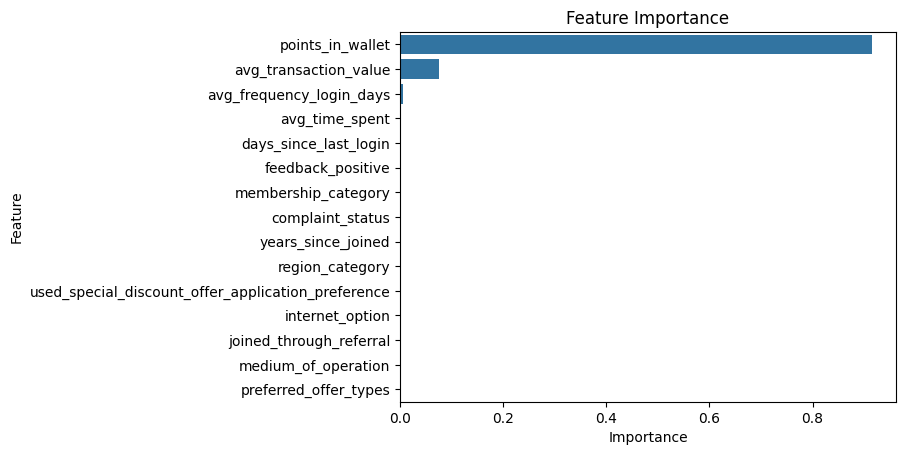

In [ ]:
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

In [ ]:
accuracy = best_model.score(X_test, y_test)
precision = precision_score(y_test, best_model.predict(X_test))
recall = recall_score(y_test, best_model.predict(X_test))
f1 = f1_score(y_test, best_model.predict(X_test))
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Accuracy: 0.8611
Precision: 0.8546
Recall: 0.8961
F1 Score: 0.8748
ROC AUC: 0.9434
